In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

C:\Users\HP\Anaconda3\envs\ori-env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\HP\Anaconda3\envs\ori-env\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\Anaconda3\envs\ori-env\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\Anaconda3\envs\ori-env\lib\si

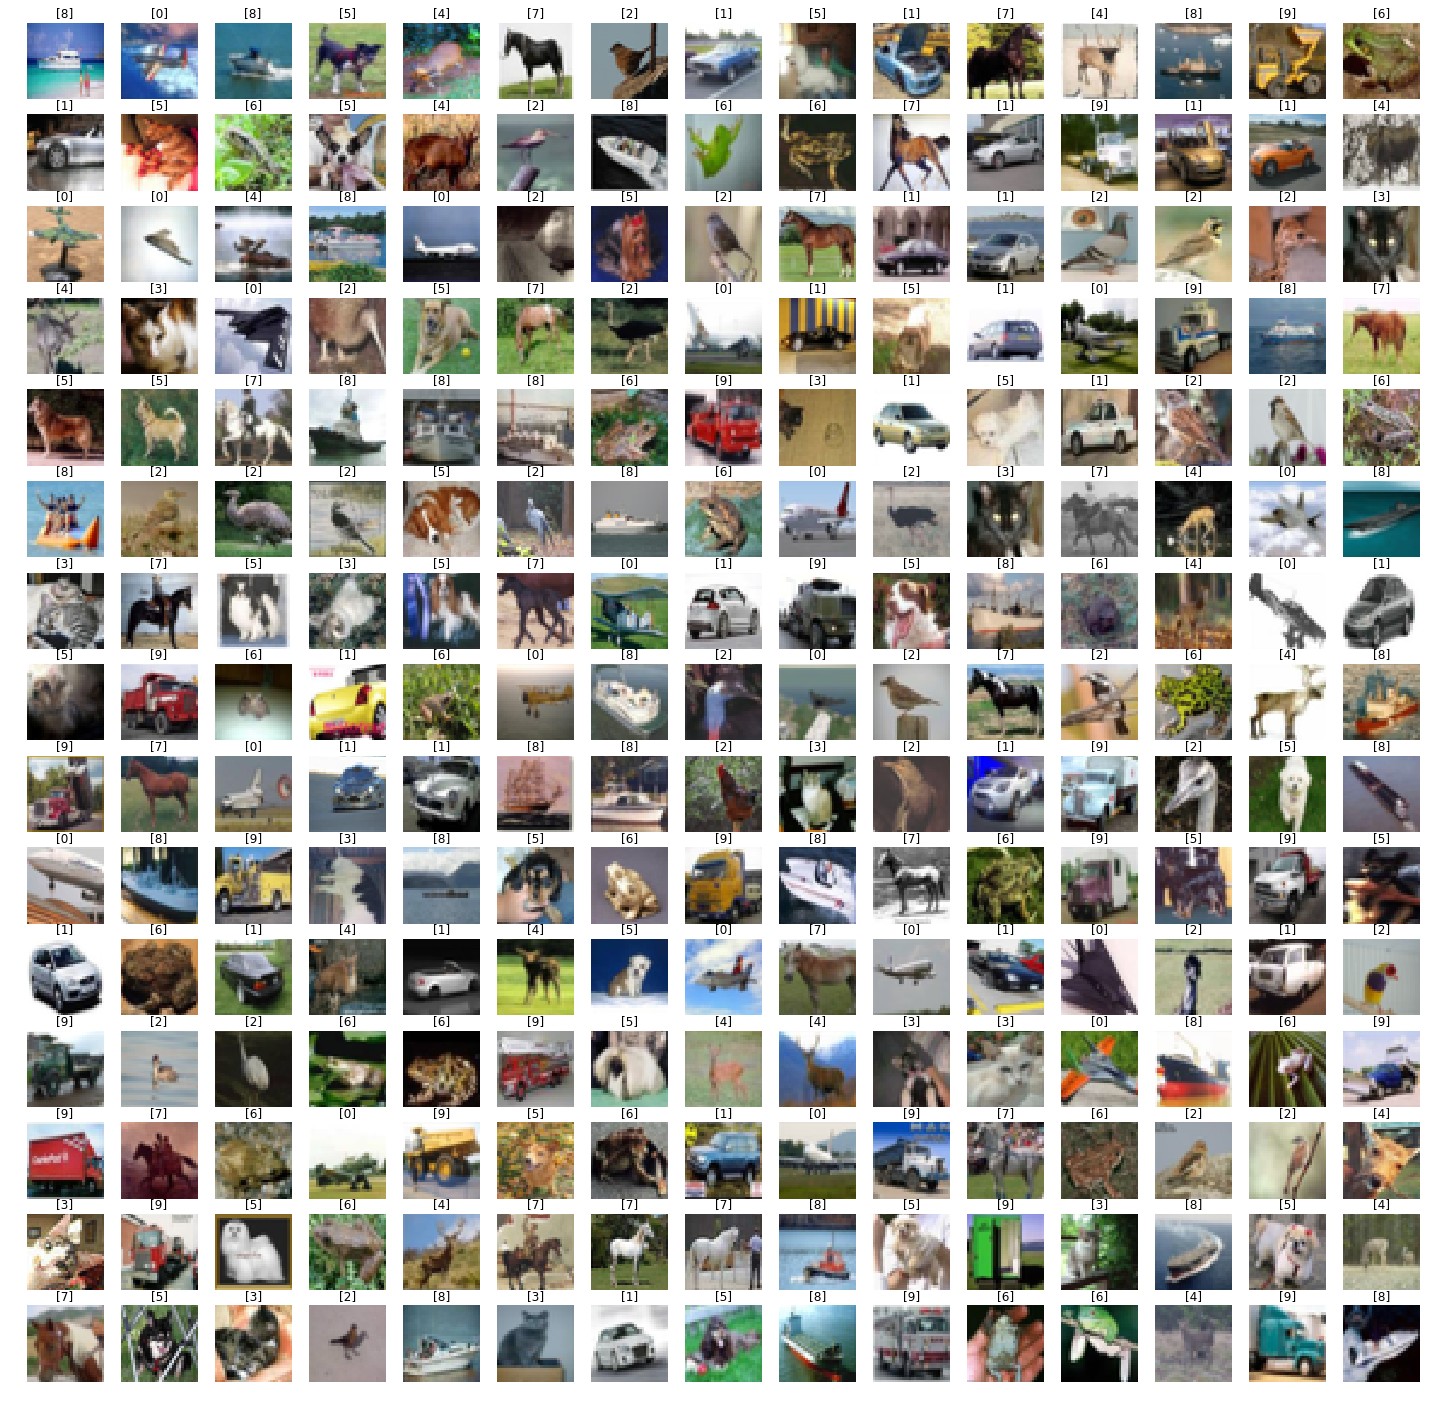

In [2]:
W_grid = 15
L_grid = 15

figure , axes = plt.subplots(L_grid,W_grid,figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid * W_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [4]:
number_cat = 10

In [5]:
import keras
y_train = keras.utils.to_categorical(y_train,number_cat)


In [6]:
y_test = keras.utils.to_categorical(y_test,number_cat)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
input_shape = X_train.shape[1:]

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [11]:
cnn = Sequential()
cnn.add(Conv2D(filters = 32, kernel_size =(3,3), 
               activation = 'relu',input_shape = (32,32,3)))
cnn.add(Conv2D(filters = 32, kernel_size =(3,3), 
               activation = 'relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu'))
cnn.add(Conv2D(filters = 64, kernel_size =(3,3), 
               activation = 'relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.2))

cnn.add(Flatten())

cnn.add(Dense(units = 512, activation = 'relu'))
cnn.add(Dense(units = 512, activation = 'relu'))
cnn.add(Dense(units = 10, activation = 'softmax'))


In [12]:
cnn.compile(loss = 'categorical_crossentropy',
            optimizer = keras.optimizers.rmsprop(lr = 0.001),
            metrics = ['accuracy'])

In [14]:
#es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=200)
#mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)
#history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])

hist = cnn.fit(X_train,y_train,batch_size = 64, epochs = 100, shuffle = True)

Epoch 1/100
50000/50000 [==============================] - 199s 4ms/step - loss: 1.6581 - acc: 0.3958
Epoch 2/100
50000/50000 [==============================] - 197s 4ms/step - loss: 1.1975 - acc: 0.5762
Epoch 3/100
50000/50000 [==============================] - 192s 4ms/step - loss: 0.9775 - acc: 0.6599
Epoch 4/100
50000/50000 [==============================] - 192s 4ms/step - loss: 0.8484 - acc: 0.7045
Epoch 5/100
50000/50000 [==============================] - 190s 4ms/step - loss: 0.7754 - acc: 0.7326
Epoch 6/100
50000/50000 [==============================] - 192s 4ms/step - loss: 0.7311 - acc: 0.7505
Epoch 7/100
50000/50000 [==============================] - 181s 4ms/step - loss: 0.6985 - acc: 0.7614
Epoch 8/100
50000/50000 [==============================] - 182s 4ms/step - loss: 0.6794 - acc: 0.7711
Epoch 9/100
50000/50000 [==============================] - 178s 4ms/step - loss: 0.6570 - acc: 0.7745
Epoch 10/100
50000/50000 [==============================] - 185s 4ms/step - loss: 

KeyboardInterrupt: 

In [15]:
cnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 7s 683us/step


[0.7886217195034028, 0.7669]

In [16]:
predicted = cnn.predict_classes(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(1),predicted)
cm

array([[773,   9,  33,  24,  32,   4,  20,   9,  61,  35],
       [ 11, 853,   3,   7,   4,   3,  23,   1,  15,  80],
       [ 53,   0, 595,  55,  92,  60, 100,  25,  13,   7],
       [ 15,   2,  41, 575,  68, 130, 108,  43,   9,   9],
       [  6,   2,  27,  49, 770,  25,  76,  38,   5,   2],
       [  5,   1,  27, 170,  43, 668,  26,  59,   1,   0],
       [  3,   0,  17,  32,  26,  11, 905,   5,   1,   0],
       [  6,   1,  14,  45,  60,  42,  14, 809,   2,   7],
       [ 38,  18,  23,   7,   9,   6,  17,   8, 850,  24],
       [ 21,  42,   5,  13,   2,   4,   8,  14,  20, 871]], dtype=int64)

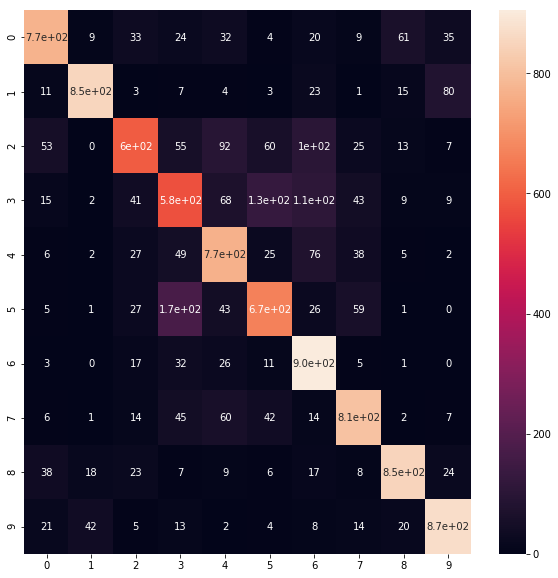

In [18]:
plt.figure(figsize = (10,10))
seaborn.heatmap(cm, annot = True)

In [19]:
cnn.save('cnn.h5')

In [92]:
'''#Augmentation part
(X,Y),(x,y) = cifar10.load_data()
X = X.astype('float32')
x = x.astype('float32')'''

In [97]:
'''from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 90,
                             width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True)
datagen.fit(X)
Y = keras.utils.to_categorical(Y,number_cat)
cnn.fit_generator(datagen.flow(X,Y,batch_size = 32), epochs = 2)'''

C:\Users\HP\Anaconda3\envs\ori-env\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


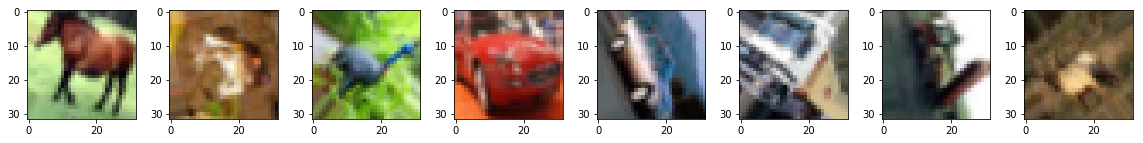

In [91]:
'''from scipy.misc import toimage
fig = plt.figure(figsize = (20,2))
for batch in datagen.flow(sample,batch_size = 8):
    for i in range(0,8):
        ax = fig.add_subplot(1, 8, i+1)
        ax.imshow(toimage(batch[i]))
    plt.show()
    break'''